In [0]:
# bibliotecas usadas
import os
import numpy as np
import pandas as pd
from scipy import optimize
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 
from mpl_toolkits.mplot3d import Axes3D, axes3d
%matplotlib inline

In [0]:
# funcao normatiza dados
def Normatiza(x):
    strings=list(x)
    for i in strings:
        max_x=x[i].max()
        min_x=x[i].min()
        a=(max_x+min_x)/2
        b=(max_x-min_x)/2
        x[i]=(x[i]-a)/b
    return x

In [0]:
# funcao retorna os dados a forma original
def Original(x,x_old):
    strings=list(x)
    for i in strings:
        max_x=x_old[i].max()
        min_x=x_old[i].min()
        a=(max_x+min_x)/2
        b=(max_x-min_x)/2
        x[i]=x[i]*b+a
    return x

In [209]:
!git clone https://github.com/ucfilho/ANN
%cd ANN

Cloning into 'ANN'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 72 (delta 5), reused 0 (delta 0), pack-reused 54
Unpacking objects: 100% (72/72), done.
/content/ANN/ANN/ANN/ANN/ANN/ANN/ANN


In [210]:
DAT=pd.read_csv("Polimero_maio_21_2015.txt",sep='\t')
print(DAT.head())

   Time     TC     Y  MI    MW
0  80.0  170.0  76.5  62  2940
1  80.0  180.0  77.0  60  3470
2  90.0  170.0  78.0  66  3680
3  90.0  180.0  79.5  59  3890
4  85.0  175.0  79.9  72  3480


In [0]:
# separa as colunas de interesse
Index=range(5)
Dat_Select=[]
Dat_Select=DAT.iloc[:,Index].copy()

In [0]:
# separa os dados em normatizados e originais
DAT_OLD=[]
DAT_OLD=Dat_Select.copy()
DAT=Normatiza(Dat_Select)

In [0]:
# separa os dados em treino e teste
train=DAT.sample(frac=1.0,random_state=None) # poderia ser frac=0.5? sim ou nao?
test=DAT.drop(train.index)

In [0]:
# obtem as variaveis independentes (treino e teste)
x_train=train.iloc[:,[0,1]]
x_test=test.iloc[:,[0,1]]
X_OLD=DAT_OLD.iloc[:,[0,1]]

In [215]:
# obtem as variaveis dependentes (treino e teste)
Index=[2,3,4]
Y_OLD=DAT_OLD.iloc[:,Index]
Index=[2] # Y as feature
y_train_Y=train.iloc[:,Index]
y_test__Y=test.iloc[:,Index]
Y_OLD_Y=DAT_OLD.iloc[:,Index]
Index=[3] # MI as feature
y_train_MI=train.iloc[:,Index]
y_test__MI=test.iloc[:,Index]
Y_OLD_MI=DAT_OLD.iloc[:,Index]
Index=[4] # Y as feature
y_train_MW=train.iloc[:,Index]
y_test_MW=test.iloc[:,Index]
Y_OLD_MW=DAT_OLD.iloc[:,Index]
print(Y_OLD.head())

      Y  MI    MW
0  76.5  62  2940
1  77.0  60  3470
2  78.0  66  3680
3  79.5  59  3890
4  79.9  72  3480


In [0]:
# define a rede neural Y
Neuron=12
clf_Y = MLPRegressor(solver='lbfgs',activation='tanh',alpha=1e-5,hidden_layer_sizes=(Neuron), 
                    random_state=1)

In [0]:
# define a rede neural MI
Neuron=12
clf_MI = MLPRegressor(solver='lbfgs',activation='tanh',alpha=1e-5,hidden_layer_sizes=(Neuron), 
                    random_state=1)

In [0]:
# define a rede neural MW
Neuron=12
clf_MW = MLPRegressor(solver='lbfgs',activation='tanh',alpha=1e-5,hidden_layer_sizes=(Neuron), 
                    random_state=1)

In [219]:
# treina a rede neural Y
clf_Y.fit(x_train, y_train_Y)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(activation='tanh', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=12, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [220]:
# treina a rede neural MI
clf_MI.fit(x_train, y_train_MI)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(activation='tanh', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=12, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [221]:
# treina a rede neural MW
clf_MW.fit(x_train, y_train_MW)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(activation='tanh', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=12, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [0]:
# usa a rede neural treina em calculos para treino e teste Y
y_calc_train=clf_Y.predict(x_train)
x_test=x_train
y_calc_test=clf_Y.predict(x_test)


In [0]:
# transforma a saida da rede em dataframe 
y_calc_train=pd.DataFrame(y_calc_train)
y_calc_test=pd.DataFrame(y_calc_test)
col_names=list(Y_OLD_Y)
y_calc_train.columns = col_names
y_calc_test.columns = col_names

In [0]:
# transforma dos dados calculados na forma original (nao normatizado)
y_calc_train=Original(y_calc_train,Y_OLD_Y)
y_calc_test=Original(y_calc_test,Y_OLD_Y)
#print(y_calc_train)
#print(Y_OLD_Y)

[[-2. -1.  0.  1.  2.]
 [-2. -1.  0.  1.  2.]
 [-2. -1.  0.  1.  2.]
 [-2. -1.  0.  1.  2.]
 [-2. -1.  0.  1.  2.]]
[[-2. -2. -2. -2. -2.]
 [-1. -1. -1. -1. -1.]
 [ 0.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  1.]
 [ 2.  2.  2.  2.  2.]]
[[56.6522 66.3155 70.4746 69.1295 62.2802]
 [63.387  73.0503 77.2094 75.8643 69.015 ]
 [66.1176 75.7809 79.94   78.5949 71.7456]
 [64.844  74.5073 78.6664 77.3213 70.472 ]
 [59.5662 69.2295 73.3886 72.0435 65.1942]]


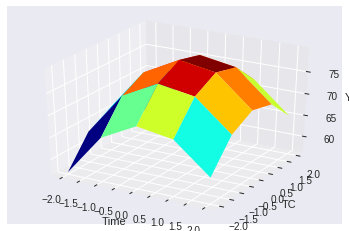

In [225]:
def f(Time, TC):
    return 79.9400+1.4070*Time+0.7285*TC-2.7521*Time**2-2.0021*TC**2

x = np.linspace(-2, 2, 5)
y = np.linspace(-2, 2, 5)

X, Y = np.meshgrid(x, y)
print(X)
print(Y)
Z = f(X, Y)
print(Z)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, cmap=plt.cm.jet, rstride=1, cstride=1, linewidth=0)
ax.set_xlabel('Time')
ax.set_ylabel('TC')
ax.set_zlabel('Y');

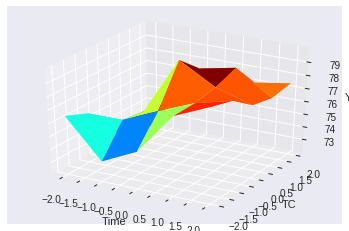

In [226]:
Num=5
x = np.linspace(-2, 2, Num)
y = np.linspace(-2, 2, Num)

X, Y = np.meshgrid(x, y)
df = pd.DataFrame({'Time':Y.flatten(), 'TC':X.flatten()})
Z=[]
Z=clf_Y.predict(df)
Z=pd.DataFrame(Z)
col_names=list(Y_OLD_Y)
Z.columns = col_names
Z=Original(Z,Y_OLD_Y)
Z=Z.values
Z=Z.reshape(Num,Num)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, cmap=plt.cm.jet, rstride=1, cstride=1, linewidth=0)
ax.set_xlabel('Time')
ax.set_ylabel('TC')
ax.set_zlabel('Y');

In [227]:
print(X.flatten())
print(X)

[-2. -1.  0.  1.  2. -2. -1.  0.  1.  2. -2. -1.  0.  1.  2. -2. -1.  0.
  1.  2. -2. -1.  0.  1.  2.]
[[-2. -1.  0.  1.  2.]
 [-2. -1.  0.  1.  2.]
 [-2. -1.  0.  1.  2.]
 [-2. -1.  0.  1.  2.]
 [-2. -1.  0.  1.  2.]]


<class 'numpy.ndarray'>
[-1.55770213 -1.56024478 -1.56278691 -1.56531841 -1.56782712 -1.57029852
 -1.57271539 -1.57505742 -1.57730085 -1.57941802 -1.5813769  -1.58314061
 -1.58466694 -1.58590784 -1.58680896 -1.58730919 -1.58734037 -1.58682701
 -1.5856863  -1.58382825 -1.58115624 -1.57756794 -1.57295668 -1.56721351
 -1.56022979 -1.55190062 -1.54212903 -1.53083078 -1.51793996 -1.50341488
 -1.58358824 -1.58621002 -1.5888     -1.59134236 -1.5938184  -1.59620619
 -1.59848015 -1.60061058 -1.60256322 -1.60429874 -1.60577223 -1.60693275
 -1.60772282 -1.60807802 -1.60792673 -1.60718987 -1.60578101 -1.60360661
 -1.60056671 -1.59655595 -1.5914652  -1.58518378 -1.57760236 -1.56861662
 -1.55813165 -1.54606709 -1.53236281 -1.51698496 -1.49993196 -1.48124015
 -1.60244933 -1.6050404  -1.60754786 -1.60994778 -1.61221232 -1.61430935
 -1.6162019  -1.6178477  -1.61919866 -1.62020041 -1.62079179 -1.62090452
 -1.62046292 -1.61938376 -1.61757642 -1.61494325 -1.61138037 -1.60677891
 -1.6010268  -1.59401123 -1

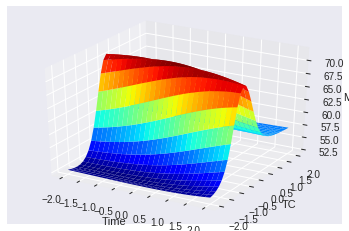

In [228]:
Num=30
x = np.linspace(-2, 2, Num)
y = np.linspace(-2, 2, Num)

X, Y = np.meshgrid(x, y)
df = pd.DataFrame({'Time':Y.flatten(), 'TC':X.flatten()})
Z=[]
Z=clf_MI.predict(df)
print(type(Z))
print(Z)
Z=pd.DataFrame(Z)
print(Z)
col_names=list(Y_OLD_MI)
Z.columns = col_names
Z=Original(Z,Y_OLD_MI)
Z=Z.values
Z=Z.reshape(Num,Num)
print(Z)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, cmap=plt.cm.jet, rstride=1, cstride=1, linewidth=0)
ax.set_xlabel('Time')
ax.set_ylabel('TC')
ax.set_zlabel('Mi');

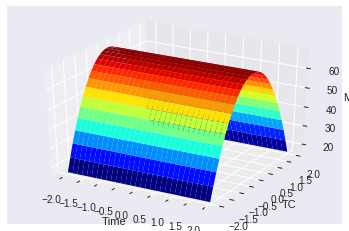

In [229]:
def f(Time, TC):
    return 69.5222-13.1952*TC**2

x = np.linspace(-2, 2, 30)
y = np.linspace(-2, 2, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, cmap=plt.cm.jet, rstride=1, cstride=1, linewidth=0)
ax.set_xlabel('Time')
ax.set_ylabel('TC')
ax.set_zlabel('MI');

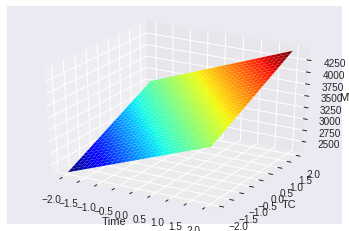

In [230]:
def f(Time, TC):
    return 3386.1538+290.0481*Time+250.7966*TC

x = np.linspace(-2, 2, 30)
y = np.linspace(-2, 2, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, cmap=plt.cm.jet, rstride=1, cstride=1, linewidth=0)
ax.set_xlabel('Time')
ax.set_ylabel('TC')
ax.set_zlabel('MW');

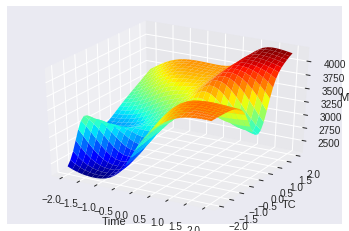

In [231]:
Num=30
x = np.linspace(-2, 2, Num)
y = np.linspace(-2, 2, Num)

X, Y = np.meshgrid(x, y)
df = pd.DataFrame({'Time':Y.flatten(), 'TC':X.flatten()}) # estrutura de dicionario
Z=[]
Z=clf_MW.predict(df)
Z=pd.DataFrame(Z)
col_names=list(Y_OLD_MW)
Z.columns = col_names
Z=Original(Z,Y_OLD_MW)
Z=Z.values
Z=Z.reshape(Num,Num)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, cmap=plt.cm.jet, rstride=1, cstride=1, linewidth=0)
ax.set_xlabel('Time')
ax.set_ylabel('TC')
ax.set_zlabel('MW');

In [0]:
def Original(x,x_old):
    strings=list(x)
    for i in strings:
        max_x=x_old[i].max()
        min_x=x_old[i].min()
        a=(max_x+min_x)/2
        b=(max_x-min_x)/2
        x[i]=x[i]*b+a
    return x

def D_Desirability(y,U,T,L):
    if y.all()<L:
        d=0
    if (y.all()>=L)&(y<=T):
        d=(y-L)/(T-L)
    if (y.all()>=T)&(y<+U):
        d=(U-y)/(U-T)
    if (y.all()>U):
        d=0
    return d

def Desirability(y,U,T,L):
    if y.item()<L:
        d=0
    if (y.item()>=L)&(y<=T):
        d=(y-L)/(T-L)
    if (y.item()>=T)&(y<+U):
        d=(U-y)/(U-T)
    if (y.item()>U):
        d=0
    return d

In [0]:
def function(x):
    global clf_Y,clf_MI,clf_MW,OLD
    Num=int(x.size/2)
    x=x.reshape(Num,2)
    
    df = pd.DataFrame(x)
    col_names=['x','y']
    df.columns = col_names
    MW=clf_MW.predict(df)
    MI=clf_MI.predict(df)
    Y=clf_Y.predict(df)
    
    OLD_MI=OLD[['MI']]
    OLD_Y=OLD[['Y']]
    OLD_MW=OLD[['MW']]
    
    Y=pd.DataFrame(Y)
    MW=pd.DataFrame(MW)
    MI=pd.DataFrame(MI)
    
    Y.columns=list(OLD_Y)
    MW.columns=list(OLD_MW)
    MI.columns=list(OLD_MI)
    
    Y=Original(Y,OLD_Y)
    MW=Original(MW,OLD_MW)
    MI=Original(MI,OLD_MI)
    
    Y=np.array(np.squeeze(Y))
    MI=np.array(np.squeeze(MI))
    MW=np.array(np.squeeze(MW))
    
    U=3890
    T=3400
    L=2940
    d1 = Desirability(MW,U,T,L)

    U=68
    T=65
    L=62
    d2 = Desirability(MI,U,T,L)

    U=80
    T=77.5
    L=75.6
    d3 =  Desirability(Y,U,T,L)

    d=(-1)*(d1*d2*d3)**(1/3)
    fun=d
    
    return fun



In [0]:
bounds = [(-2, 2),(-2, 2)]
OLD=Y_OLD
ret = optimize.differential_evolution(function,bounds,
                                      init="latinhypercube", # obs: init="random"
                                      maxiter=200, popsize=100,recombination=0.5)

In [235]:
print("global minimum: x = ",ret.x, "f(x0) = ",ret.fun)

global minimum: x =  [-0.64371282  0.33894935] f(x0) =  -0.9304820522692479


In [0]:
# funcao retorna os dados a forma original
def Descodifica(x,x_old,strings):
    k=0
    for i in strings:
        max_x=x_old[i].max()
        min_x=x_old[i].min()
        a=(max_x+min_x)/2
        b=(max_x-min_x)/2
        x[k]=x[k]*b+a
        k=k+1
    return x

In [237]:
strings=['Time','TC']
DAT=pd.read_csv("Polimero_maio_21_2015.txt",sep='\t')
xcalc=[]
xcalc=Descodifica(ret.x,DAT,strings).copy()
print("global minimum: x = ",xcalc, "f(x) = ",ret.fun)

global minimum: x =  [ 80.44895035 177.39637192] f(x) =  -0.9304820522692479


PS: no planejamento de experimentos utilizando o Statistica -e-papers
Y=80
MI=65,044
MW=3586,1

tempo=86,65 e Temperatura=178,77